In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 함수

In [ ]:
def local(L,i):
  N = L*L
  right = i+1-L*(i%L==L-1)
  left = i-1+L*(i%L==0)
  up = i-L+N*(i//L==0)
  down = i+L-N*(i//L==L-1)
  return np.array([right,up,left,down])

def find_root(ptr, idx):
  idx = int(idx)
  if ptr[idx] < 0:
    return [idx, ptr[idx]]
  else:
    return find_root(ptr, ptr[idx])

In [ ]:
def one_m_means(L,beta,steps,cut):
    p= 1 - np.exp(-2*beta)
    arr = np.random.choice([-1,1],L*L)####실제 배열 초기화
    m=np.abs(np.sum(arr)/len(arr))
    m_list=[m]

    for t in range(steps):
      ptr = np.ones(L*L)*-1####클러스터를 알려주는 배열 초기화

      for i in range(L*L): ####클러스터 만들기
        for j in local(L,i)[:2]: #이웃들 중 오른쪽과 위쪽의 연결만 확인(중복X)
          if (arr[i] == arr[j]) and (find_root(ptr, i)[0] != find_root(ptr, j)[0]):#i와 j가 둘 다 1또는-1 이고 i와 j가 서로 다른 클러스터에 위치할때,
            if np.random.random() < p:#p의 확률로 union(함수는 아니지만)

              if -(find_root(ptr, i)[1]) >= -(find_root(ptr, j)[1]):#i가 있는 클러스터의 크기가 더 클 경우
                ptr[find_root(ptr, i)[0]] += find_root(ptr, j)[1]
                ptr[find_root(ptr, j)[0]] = find_root(ptr, i)[0]
              else:
                ptr[find_root(ptr, j)[0]] += find_root(ptr, i)[1]
                ptr[find_root(ptr, i)[0]] = find_root(ptr, j)[0]

      already=[]#이미 뒤집을지 판단한 클러스터의 (root)리스트
      flips = []#뒤집어야 하는 크러스터의 (root)리스트
      for i in range(L*L): ####클러스터 50%로 뒤집기
        if find_root(ptr, i)[0] not in already:
          already.append(find_root(ptr, i)[0])
          if np.random.random() < 0.5:
            flips.append(find_root(ptr, i)[0])

        if find_root(ptr, i)[0] in flips: #50%확률로 flip 할 지 판정도 했고, flips에 그 클러스터가 있다면
            arr[i] *= -1 #flip

      m = np.abs(np.sum(arr)/len(arr))
      m_list.append(m)

    M = np.sum(m_list[cut:])/len(m_list[cut:])
    return M

## 실행 (L=5,20)

In [ ]:
%%time

#L=5
m_m_list=[]
beta_list = [0.0,0.1,0.2,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.7,0.8,0.9,1.0]
means_num=10
for beta in beta_list:

  print(beta,end=', ')

  m_list=[]
  for j in range(means_num):
    m_list.append(one_m_means(L=5,beta=beta,steps=100,cut=50))
  m_m_list.append(sum(m_list)/means_num)
print('\n')

0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.7, 0.8, 0.9, 1.0, 

CPU times: user 11.8 s, sys: 175 ms, total: 12 s
Wall time: 22 s


Text(0.5, 1.0, 'L=5')

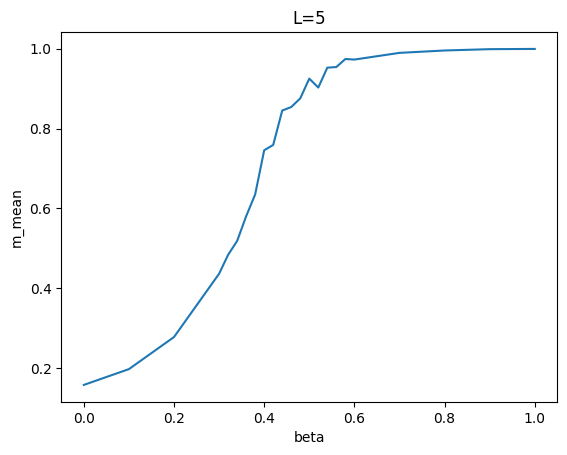

In [ ]:
plt.plot(beta_list,m_m_list)
plt.xlabel('beta')
plt.ylabel('m_mean')
plt.title('L=5')

In [ ]:
%%time

#L=20
m_m_list2=[]
beta_list = [0.0,0.1,0.2,0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.7,0.8,0.9,1.0]
means_num=10
for beta in beta_list:

  print(beta,end=', ')

  m_list=[]
  for j in range(means_num):
    m_list.append(one_m_means(L=20,beta=beta,steps=100,cut=50))
  m_m_list2.append(sum(m_list)/means_num)
print('\n')

0.0, 0.1, 0.2, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.7, 0.8, 0.9, 1.0, 

CPU times: user 2min 33s, sys: 462 ms, total: 2min 33s
Wall time: 2min 48s


Text(0.5, 1.0, 'L=20')

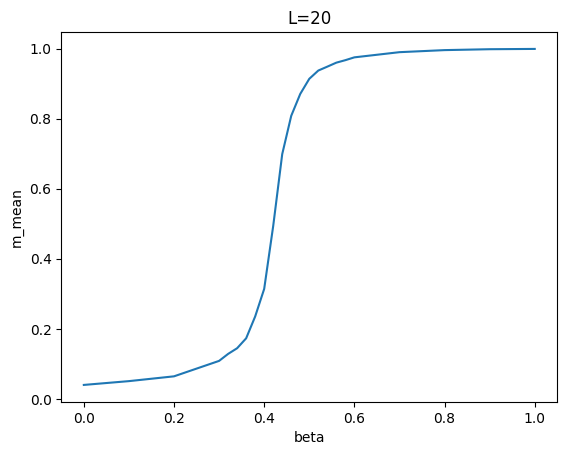

In [ ]:
plt.plot(beta_list,m_m_list2)
plt.xlabel('beta')
plt.ylabel('m_mean')
plt.title('L=20')

Text(0.5, 1.0, 'L=20')

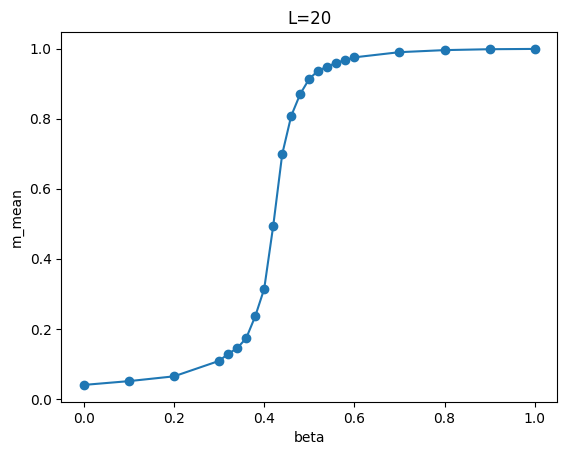

In [ ]:
plt.plot(beta_list,m_m_list2)
plt.scatter(beta_list,m_m_list2)
plt.xlabel('beta')
plt.ylabel('m_mean')
plt.title('L=20')

Text(0.5, 1.0, 'L=5,20')

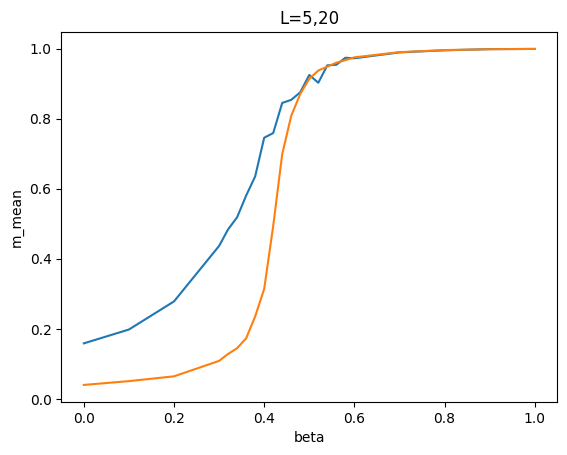

In [ ]:
plt.plot(beta_list,m_m_list)
plt.plot(beta_list,m_m_list2)
plt.xlabel('beta')
plt.ylabel('m_mean')
plt.title('L=5,20')

0.44

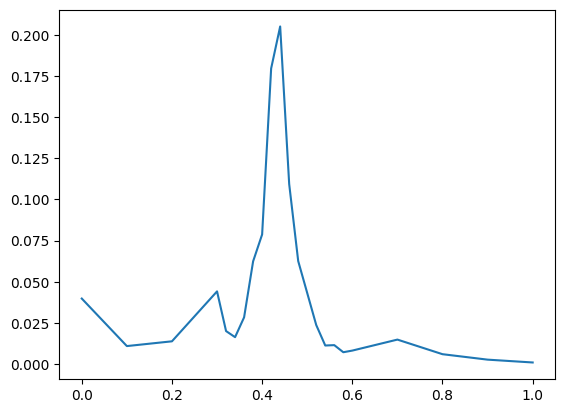

In [ ]:
dm=[]
j=0
for i in m_m_list2:
  dm.append(i-j)
  j=i

plt.plot(beta_list,dm)
beta_list[dm.index(max(dm))] #베타가 0.44일때를 beta_c로 한다.(기울기가 가장 가파른 곳!)

In [ ]:
beta_c_list=[]
for L_i in range(2,31,2):
  beta_c_list.append(one_m_means(L=L_i,beta=0.44,steps=2000,cut=50))
  print(L_i,end=',')

plt.plot(list(range(2,31,2)), beta_c_list)
plt.xscale('log')
plt.yscale('log')

2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,

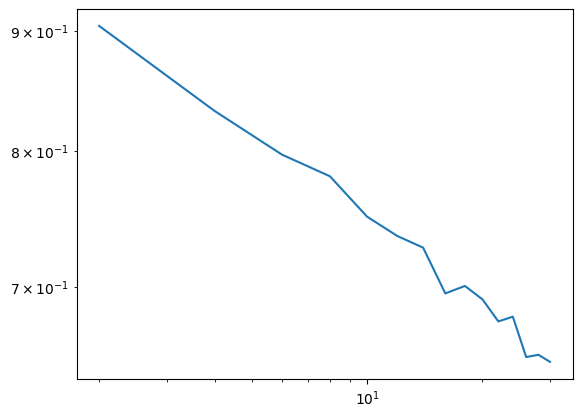

In [ ]:
plt.plot(list(range(2,31,2)), beta_c_list)
plt.xscale('log')
plt.yscale('log')

In [ ]:
beta_c_list

[0.9041517170681702,
 0.8318170169144029,
 0.7968563130018794,
 0.7801287801127627,
 0.7498103536647872,
 0.7356839797254968,
 0.7273768554064373,
 0.6954246219887237,
 0.7005524232587278,
 0.6913557150179396,
 0.6765803508266581,
 0.6797244290677146,
 0.6533699908103567,
 0.6547806462410696,
 0.6502579873569109]